<a href="https://colab.research.google.com/github/Praneesh-Sharma/Humidity-Temperature/blob/main/Humidity_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Humidity-Temperature Model
### ML project for Crazy Codigo

## Importing Libraries

In [2]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #visualizing data
import math #basic mathematical functions

## Importing the dataset

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data = data.dropna() #drops the null values

## Data Visualization

In [7]:
pd.DataFrame(data) #displays the dataset

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
295,0.615160,3.892790
296,0.524208,15.616094
297,0.647608,4.596190
298,0.410353,18.160583


## Model Creation

### Splitting the data

In [11]:
# Extracting the training data
data_train = data.iloc[:int(len(data)*0.8)]
data_train

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
235,0.449740,10.473785
236,0.638222,5.068468
237,0.000000,43.298697
238,0.443693,17.590152


In [12]:
# Extracting the test data
data_test = data.iloc[int(len(data)*0.8):]
data_test

,Humidity,Temperature
240,0.573247,17.963492
241,0.544092,9.688188
242,0.746652,-4.728179
243,0.680544,0.121390
244,0.726691,11.334751
245,0.621502,10.225213
246,0.629550,14.630749
247,0.529479,18.592511
248,0.620262,8.530652
249,0.671266,12.609810


In [13]:
#Preparing training data
X = np.array(data_train.Humidity)
y = np.array(data_train.Temperature)

In [14]:
#Function to plot the points
def plot(X,y):
    plt.plot(X,y,'o')

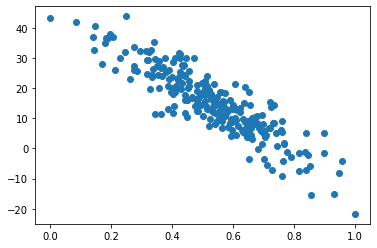

In [15]:
#Calling the plot function to plot the points
plot(X,y)

### Hypothesis

In [16]:
#Creating the hypothesis

np.random.seed(2) #so that the random values remain constant
theta = np.random.rand(2,1) #theta is allocated random numpy arrays

def hypothesis(X, theta): #defining the hypothesis function
    return theta[0] + theta[1] * X

#### Line of Regression

In [19]:
#Function to draw a line of regression
def line(theta):
    axes = plt.gca() #it will get the axis from the already existing graph
    x_value = np.array(axes.get_xlim()) #it will take the x axis and start plotting
    y_value = hypothesis(x_value, theta) 
    plt.plot(x_value,y_value,'--')

In [20]:
#Function to point the points and line 
def draw(X, y, theta):
    plot(X,y)
    line(theta)

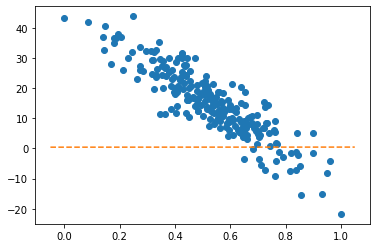

In [21]:
#Calling the draw function
draw(X,y,theta)

#### Cost function

In [22]:
#Creating the cost function
m = len(X)
def cost(X,y,theta):
    return (1/(2*m)) * np.sum((hypothesis(X,theta)-y) ** 2)

In [23]:
#Calling the cost function
cost(X,y,theta)

171.4235488910645

#### Gradient Descent

In [24]:
#Defining the gradient descent
def gradient_descent(X, y, theta, a, steps):
    for i in range(steps):
        old_cost = cost(X, y, theta)
        temp0 = theta[0] - a * ((1/m) * np.sum(hypothesis(X, theta) - y))
        temp1 = theta[1] - a * ((1/m) * np.dot((hypothesis(X, theta) - y), X))
        theta[0] = temp0
        theta[1] = temp1
        new_cost = cost(X, y, theta)
        if new_cost > old_cost:
            print("increasing")
        else:
            print("Decreasing", new_cost)

In [25]:
#Training the model with gradient descent
gradient_descent(X, y, theta, a=0.01, steps=10000)
theta

Streaming output truncated to the last 5000 lines.
Decreasing 18.63093856046193
Decreasing 18.62820388255782
Decreasing 18.625470488765117
Decreasing 18.62273837848085
Decreasing 18.62000755110233
Decreasing 18.617278006027142
Decreasing 18.614549742653164
Decreasing 18.611822760378555
Decreasing 18.609097058601748
Decreasing 18.606372636721474
Decreasing 18.60364949413673
Decreasing 18.600927630246808
Decreasing 18.598207044451268
Decreasing 18.59548773614997
Decreasing 18.592769704743038
Decreasing 18.590052949630895
Decreasing 18.587337470214226
Decreasing 18.584623265894017
Decreasing 18.58191033607152
Decreasing 18.57919868014828
Decreasing 18.576488297526115
Decreasing 18.573779187607123
Decreasing 18.57107134979369
Decreasing 18.568364783488477
Decreasing 18.565659488094433
Decreasing 18.56295546301477
Decreasing 18.560252707652996
Decreasing 18.5575512214129
Decreasing 18.554851003698545
Decreasing 18.55215205391427
Decreasing 18.5494543714647
Decreasing 18.546757955754735
Decr

array([[ 42.35160808],
       [-51.40289381]])

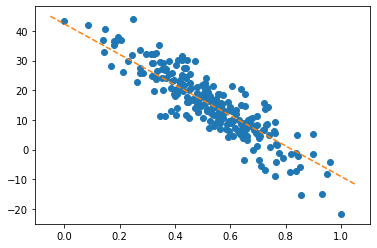

In [27]:
#plotting the trained model for training dataset
draw(X,y,theta)

### Test Data

In [28]:
#Defining the test dataset
test_x = np.array(data_test.Humidity)
test_y = np.array(data_test.Temperature)

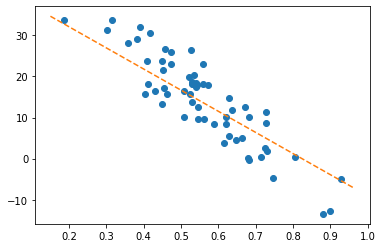

In [29]:
#Plotting the test dataset
draw(test_x,test_y,theta)

### Error Calculation

In [30]:
#Function for error calculation
def error(testx,testy,theta):
    test_predictiony = hypothesis(testx, theta)
    return abs(testy - test_predictiony)

In [31]:
#calculating the error
m = len(test_x)
s = 0
for i in range(m):
    s += error(test_x[i], test_y[i],theta)
s/m

array([4.60300211])